In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [3]:
env = gym.make('Pendulum-v0')
#env = gym.make('LunarLanderContinuous-v2')
learner = rltrain.DDPG(env, gamma=0.9, net_args={'hidden_dims': [64]})

learner.show_loss_every = 1000
viz = helpers.PendulumViz(learner)

Creating FCNet with 3->1 dims for 3 observations and 1 action dimensions


Replay Buffer has 200 transitions


/Users/leodirac/dev/ddpg/rltrain.py:288: UserWarning: Learning not implemented yet in DDPG
  warnings.warn("Learning not implemented yet in DDPG")


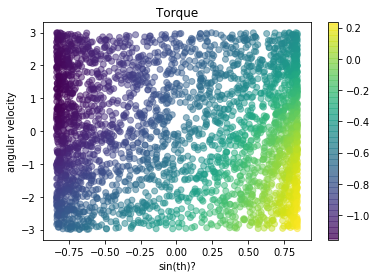

Replay Buffer has 4200 transitions


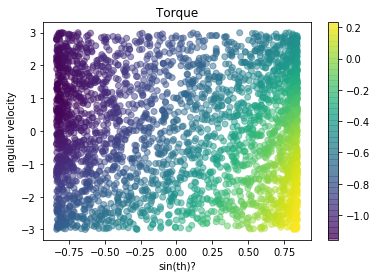

Replay Buffer has 8200 transitions


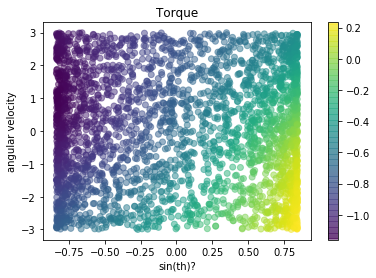

Replay Buffer has 12200 transitions


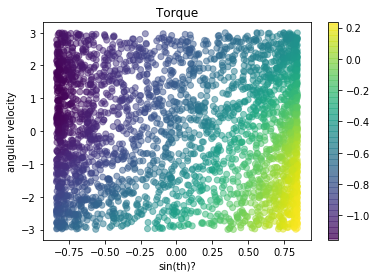

Replay Buffer has 16200 transitions


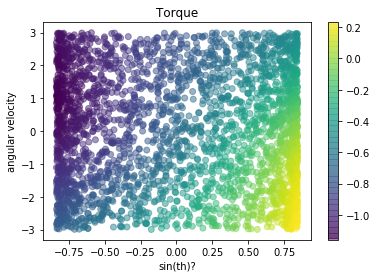

In [4]:
learner.eps = 0.5
for i in tqdm(range(100), "random warmup"):
    learner.rollout()
    if i % 20 == 0:
        print(f"Replay Buffer has {len(learner._replay)} transitions")
        viz.plot_q()



Eps = 1.00 on 1 of 5


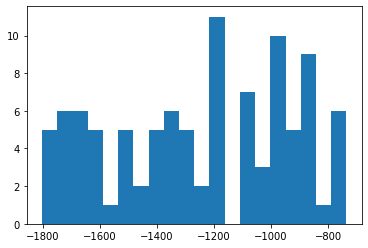

Reward mean,std = -1244.493 +/- 313.372


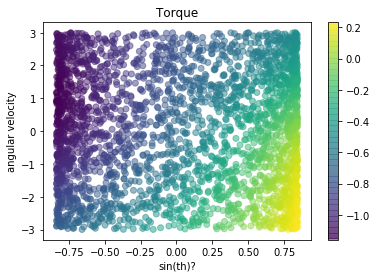



Eps = 0.82 on 2 of 5


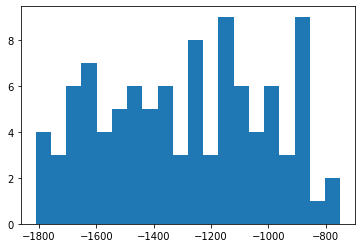

Reward mean,std = -1291.755 +/- 287.158


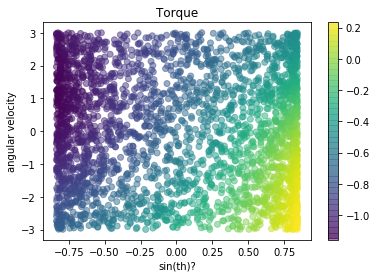



Eps = 0.64 on 3 of 5


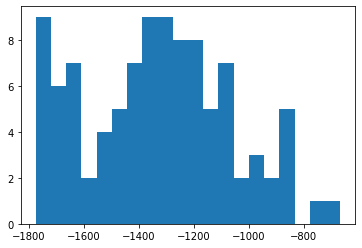

Reward mean,std = -1332.130 +/- 265.143


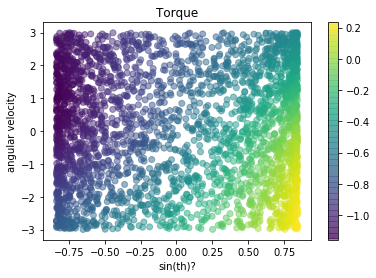



Eps = 0.45 on 4 of 5


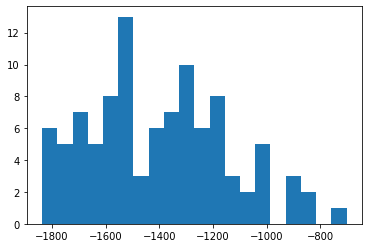

Reward mean,std = -1400.794 +/- 257.281


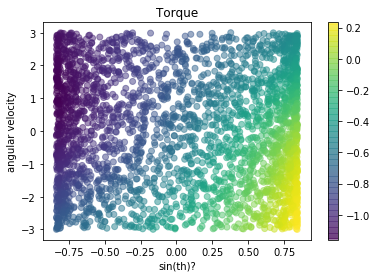



Eps = 0.27 on 5 of 5


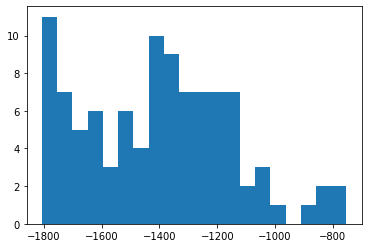

Reward mean,std = -1406.174 +/- 254.616


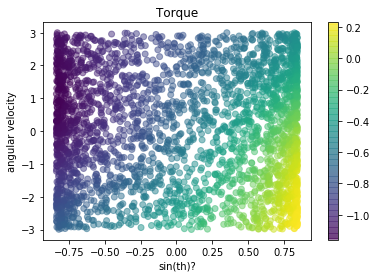

In [5]:
N = 5
for d in range(N):
    eps = 1.0 - d/(N-0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    viz.plot_q()

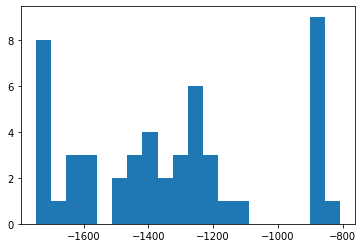

Reward mean,std = -1338.048 +/- 290.213


In [6]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=50)

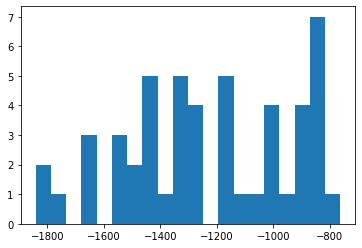

Reward mean,std = -1232.609 +/- 292.122


In [7]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=50)

In [8]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    40.78ms/cyc @     1.0 calls/cyc


In [9]:
learner.eps=0
learner.rollout(render=True)

(199, -1444.4935642970395)